## Ομαδοποίηση k-means


In [1]:
# εισαγωγή απαραίτητων βιβλιοθηκών
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score as sil
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler


In [2]:
# φόρτωση βάσης δεδομένων
df0 = pd.read_csv('qm_moto1.csv',delimiter=';')
df0 = df0[df0['over']!=1]
df0.head()

,count,frame,lane,on_the_fly,over,Veh_ TypeM,Vm,Veh_ Type1,Veh_RL,V1,...,s_x,s_y,distancexy,V2,V3,helmet,passenger,dif,ttc,ttcc
0,1,75,0,1,0,0,71,2,1,69,...,1.6,4.9,5.2,64.0,75.0,1,0,2,5.100000,5.100000
1,2,75,1,0,0,0,63,2,1,69,...,0.1,6.6,6.6,71.0,75.0,0,0,-6,-1.933333,0.000000
2,3,105,1,1,0,0,63,1,0,64,...,3.3,7.2,7.9,55.0,63.0,1,0,-1,-12.900000,0.000000
5,6,3055,1,1,0,0,58,1,0,45,...,3.1,6.6,7.3,0.0,43.0,1,0,13,0.946154,0.946154
6,7,3205,1,1,0,0,54,1,0,53,...,1.6,12.2,12.3,44.0,72.0,1,0,1,17.300000,17.300000


In [3]:
# μεταβλητές που μας ενδιαφέρουν
df = df0[['dif','s_x','s_y','d3','d0','d1']].copy()

#Θα μπορούσαμε να εξετάσουμε και λογικές rescaling για να δούμε πώς επηρεάζεται η ποιότητα των αποτελεσμάτων
#df['normdif'] = StandardScaler().fit_transform(pd.array(df['dif']).reshape(-1, 1))

df.head()

,dif,s_x,s_y,d3,d0,d1
0,2,1.6,4.9,1.7,28.4,35.6
1,-6,0.1,6.6,1.7,28.4,21.3
2,-1,3.3,7.2,1.6,48.0,52.0
5,13,3.1,6.6,0.3,88.3,255.0
6,1,1.6,12.2,255.0,23.6,84.2


C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

Text(0, 0.5, 'Distortion')

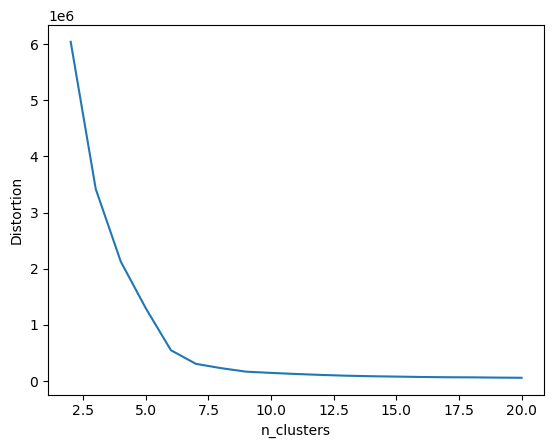

In [4]:
# εφαρμογή κανόνα του "αγκώνα" για τον προσδιορισμό του βέλτιστου αριθμού clusters
n_c = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] # πιθανό πλήθος clusters
scores = []
for n in n_c:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df)
    scores.append(kmeans.inertia_)
    
plt.plot(n_c,scores)
plt.xlabel('n_clusters')
plt.ylabel('Distortion')
    

Σύμφωνα με το παραπάνω διάγραμμα, ο βέλτιστος αριθμός clusters είναι 5.

In [5]:
# ανάπτυξη μοντέλου για 7 clusters
kmeans = KMeans(n_clusters=7)
c = kmeans.fit_predict(df)
# εκτύπωση κέντρων των clusters
centers = pd.DataFrame(data = kmeans.cluster_centers_)
centers.columns = ['dif','s_x','s_y','d3','d0','d1']
centers.index = ['cluster_1','cluster_2','cluster_3','cluster_4','cluster_5','cluster_6','cluster_7']
centers

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,dif,s_x,s_y,d3,d0,d1
cluster_1,5.796875,1.884375,7.737500,1.585937,36.767969,50.955469
cluster_2,3.965517,2.872414,7.989655,255.000000,255.000000,241.062069
cluster_3,5.838710,2.548387,8.125806,1.545161,255.000000,255.000000
cluster_4,5.625000,1.629167,8.491667,1.489583,255.000000,44.650000
cluster_5,0.608696,2.269565,8.417391,255.000000,39.073913,255.000000
cluster_6,4.951220,2.807317,6.068293,1.460976,33.136585,255.000000
cluster_7,6.250000,2.100000,7.737500,255.000000,24.437500,53.087500


In [6]:
# αξιολόγηση της ποιότητας του clustering
# εκτίμηση του silhouette index

print(sil(df, kmeans.predict(df), metric='euclidean'))

0.8250688677188559


In [7]:
centers.to_csv('centers.csv')


## Self Organizing Maps (SOM)

In [32]:
# Αρχικοποίηση και εκπαίδευση ενος SOM 10x10 νευρώνων
som = MiniSom(10, 10, 6, sigma=1.0, learning_rate=0.9)
som.train(df.values, 5000, random_order=False, verbose=True)

 [ 3757 / 5000 ]  75% - 0:00:00 left 

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 7.243847139045931


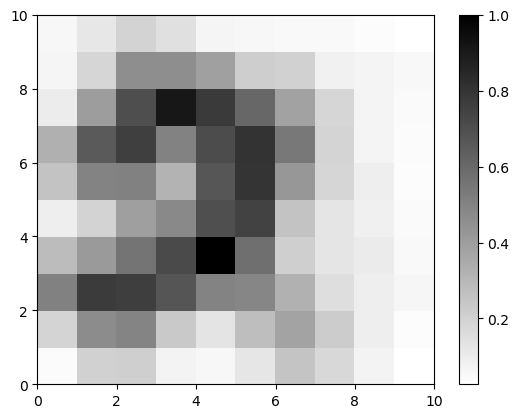

In [33]:
# εκτύπωση του SOM (χάρτης αποστάσεων) -- τα πιο σκουρόχρωμα κομμάτια αντιστοιχούν στα clusters και τα ανοιχτόχρωμα διαχωρίζουν τα clusters μεταξύ τους
plt.pcolor(som.distance_map().T, cmap='binary')
plt.colorbar()

IndexError: index 144 is out of bounds for axis 0 with size 144

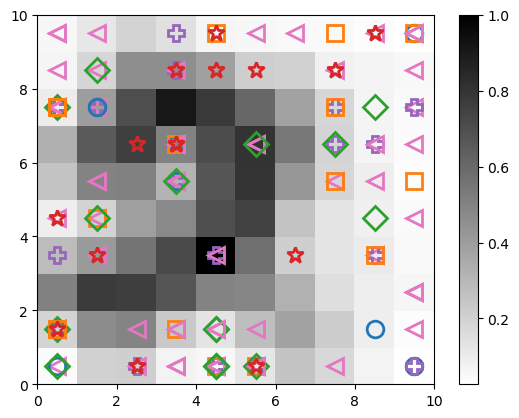

In [37]:
plt.pcolor(som.distance_map().T, cmap='binary')
plt.colorbar()

markers = ['o', 's', 'D','*','P','X','<']
colors = ['C0', 'C1', 'C2', 'C3','C4','C5','C6']
for cnt, xx in enumerate(df.values):
    w = som.winner(xx)
    plt.plot(w[0]+.5, w[1]+.5, markers[c[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[c[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

In [38]:
weight=som.get_weights()
print(weight.shape)
map_size=(10,10)
weight2=weight.reshape(100,6)
weight2=pd.DataFrame(data=weight2)
weight2.to_csv('neurons.csv')

(10, 10, 6)


C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

Text(0, 0.5, 'Distortion')

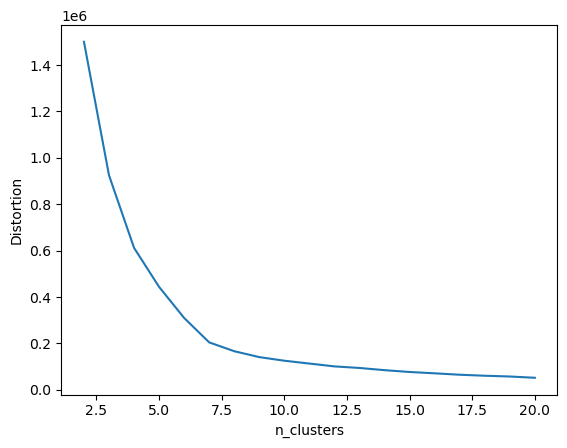

In [39]:
# εφαρμογή κανόνα του "αγκώνα" για τον προσδιορισμό του βέλτιστου αριθμού clusters
n_c = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] # πιθανό πλήθος clusters
scores = []
for n in n_c:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(weight2)
    scores.append(kmeans.inertia_)
    
plt.plot(n_c,scores)
plt.xlabel('n_clusters')
plt.ylabel('Distortion')



In [40]:
# ανάπτυξη μοντέλου για 6 clusters
kmeans = KMeans(n_clusters=6)
c = kmeans.fit_predict(weight2)
# εκτύπωση κέντρων των clusters
centers = pd.DataFrame(data = kmeans.cluster_centers_)
centers.columns = ['dif','s_x','s_y','d3','d0','d1']
centers.index = ['cluster_1','cluster_2','cluster_3','cluster_4','cluster_5','cluster_6']
centers

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,dif,s_x,s_y,d3,d0,d1
cluster_1,6.122139,2.672349,6.491309,16.685942,35.682102,242.248732
cluster_2,5.683641,1.930318,7.898988,12.260531,40.296657,55.393604
cluster_3,2.762185,2.138998,8.619646,243.895414,46.319900,219.032450
cluster_4,4.975522,1.397030,8.632576,6.681308,240.006911,51.285826
cluster_5,3.767361,3.629616,7.744664,236.276987,216.932830,206.034166
cluster_6,4.915923,2.573015,7.999135,5.889996,251.196541,243.466294


In [41]:
centers.to_csv('centersSOM.csv')

In [42]:
print(sil(weight2, kmeans.predict(weight2), metric='euclidean'))

0.6445669022194563
